# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_df = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Create your list for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for every_element in lat_lngs:
    city = citipy.nearest_city(every_element[0], every_element[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
#code verification it worked correctly
len(lats)

1500

In [4]:
#lats
#lngs
lat_lngs

In [5]:
#cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#for i, city in enumerate(cities):
    #print(i, cities)

In [7]:
#initial URL we will create our final city list from
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
#?q=London,uk&appid=YOUR_API_KEY
city_data = []

#perform their desired print to logger
print("Beginning Data Retrieval")
print("--------------------------")

record_count = 1
set_count =1

for i, city in enumerate(cities):
    if(i % 50 == 0 and i >=50):
        set_count  = set_count + 1
        record_count = 0 
        
    city_url= url + "&q="+city
    
    print("Processing Record"+str(record_count) + "of Set" + str(set_count)+ "|" + city)
    #print(f"Processing Record {record_count} of set {set_count}|{city}")      
    print (city_url)
   
    try:
        city_weather = requests.get(city_url).json()
        #retrieving the data and parsing the json
        #parse out the data you need from the JSON
        city_latitude = city_weather['coord']['lat']
        city_long = city_weather['coord']['lon']
        city_tempMax = city_weather['main']['temp_max']
        city_wind = city_weather['wind']['speed']
        city_humidity = city_weather['main']['humidity']
        city_date = city_weather['dt']
        city_country = city_weather['sys']['country']
        city_cloudiness = city_weather['clouds']['all']
          
        city_data.append({"City": city,
                    "Cloudiness": city_cloudiness,
                      "Country": city_country,
                      "Date" : city_date  ,
                      "Humidity": city_humidity ,
                      "Lat": city_latitude,
                      "Longitude": city_long ,
                      "Max Temp": city_tempMax ,
                      "Wind Speed (mph)": city_wind}
                        )
    except:
        print("City not found. Skipping...")
        pass

#Show your data loading is complete
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")
          
    

Beginning Data Retrieval
--------------------------
Processing Record1of Set1|westport
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=westport
Processing Record1of Set1|rikitea
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=rikitea
Processing Record1of Set1|attawapiskat
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=attawapiskat
City not found. Skipping...
Processing Record1of Set1|torbay
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=torbay
Processing Record1of Set1|punta arenas
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=punta arenas
Processing Record1of Set1|kefar shemaryahu
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=kefar shemaryahu
Proces

City not found. Skipping...
Processing Record0of Set2|puerto quijarro
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=puerto quijarro
Processing Record0of Set2|lata
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=lata
Processing Record0of Set2|bluff
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=bluff
Processing Record0of Set2|renqiu
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=renqiu
Processing Record0of Set2|panaba
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=panaba
Processing Record0of Set2|hermanus
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=hermanus
Processing Record0of Set2|klaksvik
https://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record0of Set3|meteti
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=meteti
Processing Record0of Set3|tautira
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=tautira
Processing Record0of Set3|esso
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=esso
Processing Record0of Set3|saint anthony
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=saint anthony
Processing Record0of Set3|tokzar
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=tokzar
City not found. Skipping...
Processing Record0of Set3|iqaluit
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=iqaluit
Processing Record0of Set3|spirit river
https://api.openweathermap.org/data/2.5/weather?units=I

Processing Record0of Set4|banda aceh
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=banda aceh
Processing Record0of Set4|northam
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=northam
Processing Record0of Set4|mar del plata
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=mar del plata
Processing Record0of Set4|fort-shevchenko
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=fort-shevchenko
Processing Record0of Set4|bonthe
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=bonthe
Processing Record0of Set4|nanortalik
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=nanortalik
Processing Record0of Set4|skjervoy
https://api.openweathermap.org/data/2.5/weather?uni

Processing Record0of Set5|bundaberg
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=bundaberg
Processing Record0of Set5|dibulla
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=dibulla
Processing Record0of Set5|katangli
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=katangli
Processing Record0of Set5|port moresby
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=port moresby
Processing Record0of Set5|krasnoselkup
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=krasnoselkup
City not found. Skipping...
Processing Record0of Set5|pochutla
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=pochutla
Processing Record0of Set5|harper
https://api.openweathermap.org/data

Processing Record0of Set6|luderitz
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=luderitz
Processing Record0of Set6|khamaria
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=khamaria
Processing Record0of Set6|haines junction
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=haines junction
Processing Record0of Set6|tuktoyaktuk
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=tuktoyaktuk
Processing Record0of Set6|gualaquiza
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=gualaquiza
Processing Record0of Set6|henties bay
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=henties bay
Processing Record0of Set6|novoagansk
https://api.openweathermap.org/data/2.5/weath

Processing Record0of Set7|crossville
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=crossville
Processing Record0of Set7|montlucon
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=montlucon
Processing Record0of Set7|bolama
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=bolama
Processing Record0of Set7|puerto escondido
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=puerto escondido
Processing Record0of Set7|moses lake
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=moses lake
Processing Record0of Set7|naze
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=naze
Processing Record0of Set7|safwah
https://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

City not found. Skipping...
Processing Record0of Set8|mlonggo
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=mlonggo
Processing Record0of Set8|port hedland
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=port hedland
Processing Record0of Set8|srednekolymsk
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=srednekolymsk
Processing Record0of Set8|brae
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=brae
Processing Record0of Set8|mandera
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=mandera
Processing Record0of Set8|casper
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=casper
Processing Record0of Set8|vao
https://api.openweathermap.org/data/2.5/weather?unit

Processing Record0of Set9|paita
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=paita
Processing Record0of Set9|progreso
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=progreso
Processing Record0of Set9|grand centre
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=grand centre
City not found. Skipping...
Processing Record0of Set9|beipiao
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=beipiao
Processing Record0of Set9|vaitupu
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=vaitupu
City not found. Skipping...
Processing Record0of Set9|floriano
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=floriano
Processing Record0of Set9|hope
https://api.openweathermap.

Processing Record0of Set10|knysna
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=knysna
Processing Record0of Set10|arys
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=arys
Processing Record0of Set10|thai binh
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=thai binh
Processing Record0of Set10|puerto leguizamo
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=puerto leguizamo
Processing Record0of Set10|bulawayo
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=bulawayo
Processing Record0of Set10|melnik
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=melnik
Processing Record0of Set10|boende
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b

Processing Record0of Set11|saint-louis
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=saint-louis
Processing Record0of Set11|ugoofaaru
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=ugoofaaru
Processing Record0of Set11|balimo
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=balimo
City not found. Skipping...
Processing Record0of Set11|hambantota
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=hambantota
Processing Record0of Set11|rio novo do sul
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=rio novo do sul
Processing Record0of Set12|yarada
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=yarada
Processing Record0of Set12|leningradskiy
https://api.openwea

Processing Record0of Set13|lieksa
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=lieksa
Processing Record0of Set13|akyab
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=akyab
City not found. Skipping...
Processing Record0of Set13|ketchikan
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=ketchikan
Processing Record0of Set13|iquique
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=iquique
Processing Record0of Set13|jining
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=jining
Processing Record0of Set13|bagotville
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57970d2b65ba23a228ccf2ed01a9709&q=bagotville
Processing Record0of Set13|slonim
https://api.openweathermap.org/data/2.5/weather?units=

In [8]:
#let it begin! convert the json to a panda df and preview
city_data_pd= pd.DataFrame(city_data)
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Longitude,Max Temp,Wind Speed (mph)
0,westport,90,US,1575677514,57,41.14,-73.36,50.00,14.99
1,rikitea,100,PF,1575677515,80,-23.12,-134.97,74.88,17.47
2,torbay,90,CA,1575677515,87,47.66,-52.73,35.01,13.87
3,punta arenas,92,CL,1575677515,66,-53.16,-70.91,50.00,31.09
4,kefar shemaryahu,40,IL,1575677516,82,32.19,34.82,57.99,2.24


In [9]:
#reorganize columns into a meaningful order
city_data_pd = city_data_pd[["City","Country","Date","Lat","Max Temp","Humidity",
                             "Cloudiness","Wind Speed (mph)"]]
#city_data_pd.head()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#Check record count
city_data_pd.count()

City                557
Country             557
Date                557
Lat                 557
Max Temp            557
Humidity            557
Cloudiness          557
Wind Speed (mph)    557
dtype: int64

In [11]:
#display final df
city_data_pd.head()

,City,Country,Date,Lat,Max Temp,Humidity,Cloudiness,Wind Speed (mph)
0,westport,US,1575677514,41.14,50.00,57,90,14.99
1,rikitea,PF,1575677515,-23.12,74.88,80,100,17.47
2,torbay,CA,1575677515,47.66,35.01,87,90,13.87
3,punta arenas,CL,1575677515,-53.16,50.00,66,92,31.09
4,kefar shemaryahu,IL,1575677516,32.19,57.99,82,40,2.24


In [12]:
#export to csv
city_data_pd.to_csv(output_df, index_label="city_ID")

In [13]:
#extract data for plots
lats= city_data_pd['Lat']
temp= city_data_pd['Max Temp']
humidity= city_data_pd['Humidity']
cloudiness= city_data_pd['Cloudiness']
wind= city_data_pd['Wind Speed (mph)']

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

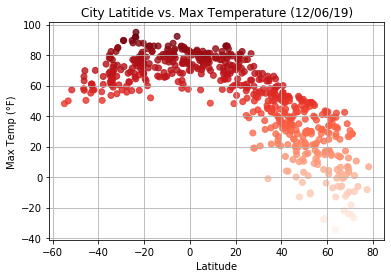

In [47]:
#Building mpl scatter plot for Lat v Temp
plt.scatter(lats, temp, c=temp, cmap="Reds", alpha=0.8)

#other graph properties
plt.title(f"City Latitide vs. Max Temperature ({time.strftime('%x')})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (°F)")
plt.savefig("LatvTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

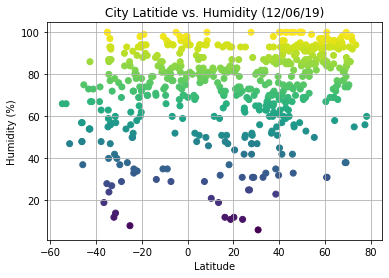

In [34]:
#Building mpl scatter plot for Lat v Humidity
plt.scatter(lats, humidity, c=humidity, cmap="viridis")

#other graph properties
plt.title(f"City Latitide vs. Humidity ({time.strftime('%x')})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("LatvHumid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

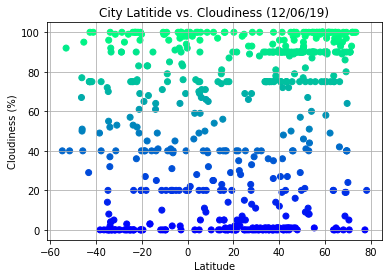

In [39]:
#Building mpl scatter plot for Lat v Cloudiness
plt.scatter(lats, cloudiness, c=cloudiness, cmap="winter")

#other graph properties
plt.title(f"City Latitide vs. Cloudiness ({time.strftime('%x')})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("LatvCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

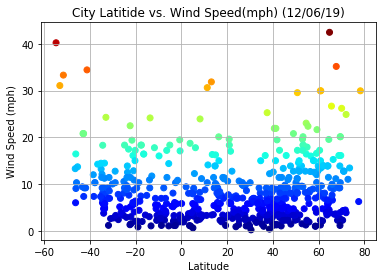

In [42]:
#Building mpl scatter plot for Lat v Wind Speed
plt.scatter(lats, wind, c=wind, cmap="jet")

#other graph properties
plt.title(f"City Latitide vs. Wind Speed(mph) ({time.strftime('%x')})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("LatvWind.png")
plt.show()

####Observations:
1: Temperatures do seem to be higher within 20 degrees of the the equator. 
2: There does not seem to be a direct coorelation between lattitude and cloudiness or humidity.
3: Although there doesn't seem to be a coorelation of wind speed getting closer to the equator, there does appear to be a drastic increase of windspeeds the farther you go from the middle latitudes. 
